In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [164]:
df = pd.read_csv('LC_chosen_columns.csv')

In [165]:
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,...,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 29 columns):
Unnamed: 0              int64
loan_amnt               float64
term                    object
int_rate                float64
installment             float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc              float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                     float64
earliest_cr_line        object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status     object
application_type        object
mort_acc                float64
pub_rec_b

In [167]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

We want to focus only on the outcomes: Fully paid and Charged off in order to detect the customers who defaulted.

In [168]:
df = df[(df['loan_status'] == 'Fully Paid' )| (df['loan_status'] == 'Charged Off' )]

## Basic EDA

Let's do some visualizations.

Text(0.5, 1.0, 'Fully Paid vs Charged Off')

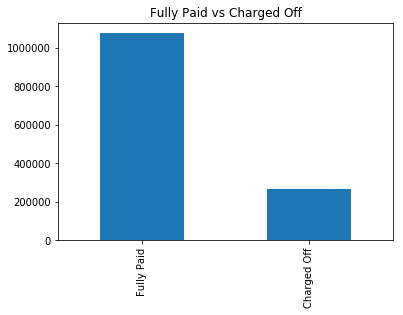

In [169]:
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Fully Paid vs Charged Off')

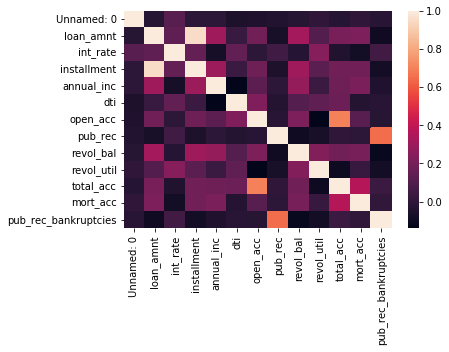

In [170]:
sns.heatmap(df.corr())

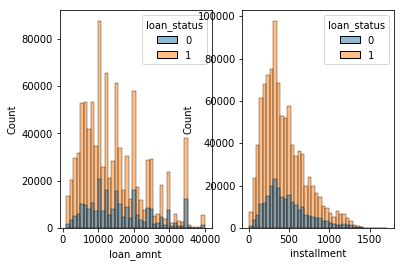

In [208]:
#df[['loan_amnt','installment','loan_status']].groupby('loan_status').hist()
plt.subplot(1,2,1)
sns.histplot(df, x = 'loan_amnt', hue = 'loan_status', bins = 40)
plt.subplot(1, 2, 2)
sns.histplot(df, x = 'installment', hue = 'loan_status', bins = 40)

It is interesting to see how many missing values we have.

In [172]:
df.isna().sum()

Unnamed: 0                  0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               85785
emp_length              78511
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                   16659
zip_code                    1
addr_state                  0
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
dtype: int64

## Feature Selection

We are dropping categorical variables that have more than 20 distinct values in order to not overfit the final model. 

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 29 columns):
Unnamed: 0              1345310 non-null int64
loan_amnt               1345310 non-null float64
term                    1345310 non-null object
int_rate                1345310 non-null float64
installment             1345310 non-null float64
grade                   1345310 non-null object
sub_grade               1345310 non-null object
emp_title               1259525 non-null object
emp_length              1266799 non-null object
home_ownership          1345310 non-null object
annual_inc              1345310 non-null float64
verification_status     1345310 non-null object
issue_d                 1345310 non-null object
loan_status             1345310 non-null object
purpose                 1345310 non-null object
title                   1328651 non-null object
zip_code                1345309 non-null object
addr_state              1345310 non-null object
dti                 

'Unnamed: 0' is not an important feature since it is only here to index the data. Beside, 'sub_grade' is giving more information that 'grade' so we can drop the feature 'grade'.

In [174]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [175]:
df.drop('grade', axis = 1, inplace = True)

In [176]:
for i, col in enumerate([column for column in df.columns if df[column].dtype == object]):
    if df[col].nunique() > 40:
        df.drop(col, axis = 1, inplace = True)

In [177]:
for i, col in enumerate([column for column in df.columns if df[column].dtype == object]):
    print(col,'has ', df[col].nunique(),' distinct values')

term has  2  distinct values
sub_grade has  35  distinct values
emp_length has  11  distinct values
home_ownership has  6  distinct values
verification_status has  3  distinct values
loan_status has  2  distinct values
purpose has  14  distinct values
initial_list_status has  2  distinct values
application_type has  2  distinct values


Let's drop all the rows with missing values.

In [178]:
df.dropna(inplace = True)

In [179]:
df.shape

(1220092, 21)

## Categorical variables

Now, let's create dummy variables with the remaining categorical variables. 

In [181]:
df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year'],
      dtype=object)

In [182]:
len_val = {'10+ years':10, '2 years': 2, '3 years': 3, 
          '< 1 year': 0.5, '1 year': 1, '5 years': 5,
          '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}

df['emp_length'] = df.emp_length.map(len_val)

In [184]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [185]:
print([column for column in df.columns if df[column].dtype == object])

['sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']


In [186]:
dummies = (
    ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 
      'initial_list_status', 'application_type']
)

In [187]:
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [188]:
df.shape

(1220092, 71)

The output should be numerical so we need to map a binary outcome as following:

In [189]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [190]:
loan = {'Fully Paid': 1, 'Charged Off': 0}
df['loan_status'] = df.loan_status.map(loan)
df['loan_status']

0          1
1          1
2          1
4          1
5          1
          ..
2260688    1
2260690    1
2260691    0
2260692    1
2260697    0
Name: loan_status, Length: 1220092, dtype: int64

## Split train/test sets

Now we can begin the machine learning models. First, we need to split the training and testing set. 

In [191]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)


from sklearn.ensemble import RandomForestClassifier


It is important to check if the dataset is balanced or not in order to know what kind of metrics are we going to use to assess the models.

In [192]:
w_p = df.loan_status.value_counts()[0] / df.shape[0]
w_n = df.loan_status.value_counts()[1] / df.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.19725807562052697
Weight of negative values 0.802741924379473


In [193]:
import random

random.seed()

train, test = train_test_split(df, test_size=0.3, random_state=42)

print(train.shape)
print(test.shape)

(854064, 71)
(366028, 71)


In [194]:
train.loan_status.value_counts()[1] / df.shape[0]

0.5619182815722094

## Removing outiliers

Outliers on the training set could really negatively impact our model since it could create biais. We are going to deal with them in the following cells:

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


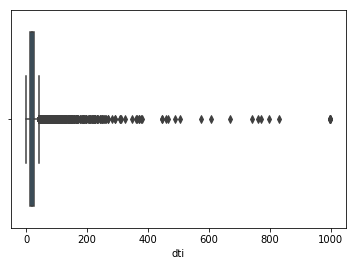

In [195]:
sns.boxplot(train['dti'])

In [196]:
train['dti'].describe()

count    854064.00000
mean         18.30222
std           9.60013
min          -1.00000
25%          11.91000
50%          17.68000
75%          24.13000
max         999.00000
Name: dti, dtype: float64

From above, we can see that the variable 'dti' has a lot of outliers. We could remove all the values that are above 50. 

We can do the same kind of work on the remaining numerical variables and we can remove their respectively ouliers. Finally, we can keep the following values:

In [197]:
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]

## Splitting the target variable

Then we split the training and testing set from the target variable.

In [198]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [199]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_stat

In [200]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

## Models

### Logistic 

The first model that we implement is the logistic regression: 

In [201]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=88, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
## build the confusion matrix
y_prob = logreg.predict_proba(X_test)
y_pred_log = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

cm = confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix: \n", cm)
print ("\nPrecision:", precision_score(y_test, y_pred_log))
print ("\nF1:", f1_score(y_test, y_pred_log))
print ("\nauc:", roc_auc_score(y_test, y_pred_log))
print ("\nrecall:", recall_score(y_test, y_pred_log))

Confusion Matrix: 
 [[  2226  69975]
 [  3994 289833]]

Precision: 0.8055212780149413

F1: 0.8868343953429666

auc: 0.5086187826396532

recall: 0.9864069673651502


Since the dataset is imbalanced, we should focus on F1 score. We obtain a good score with this model.

### Random Forest

We could also use Random Forest to try to get a better F1 score.

In [203]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [204]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nPrecision:", precision_score(y_test, y_pred))
print ("\nF1:", f1_score(y_test, y_pred))
print ("\nauc:", roc_auc_score(y_test, y_pred))
print ("\nrecall:", recall_score(y_test, y_pred))

Confusion Matrix: 
 [[  6163  66038]
 [  5661 288166]]

Precision: 0.8135594177366715

F1: 0.8893586880874527

auc: 0.5330462447257911

recall: 0.9807335609048862


In [205]:
X_test.iloc[0:1]

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
1191364,28000.0,36.0,8.39,882.469971,5.0,165000.0,15.07,8.0,1.0,13960.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
y_pred = rf.predict(X_test.iloc[0:1])
y_pred

array([1.], dtype=float32)